In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

# Rand Index
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import rand_score

# Encode labels
from sklearn import preprocessing

# Confusion Matrix
from sklearn.metrics import confusion_matrix
np.random.seed(42)

# K-Modes
from kmodes.kmodes import KModes


## Load the dataset

In [2]:
df = pd.read_csv('Data-Mushroom/mushrooms.csv',header=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
y = df[['class']]
x = df.drop('class', axis=1)
print(f"Original columns shape: {df.columns.shape}")
print(f"To cluster columns shape: {x.columns.shape}")

Original columns shape: (23,)
To cluster columns shape: (22,)


## Preprocessing data

In [5]:
# Remove columns with only one unique value
x = x.loc[:,x.nunique()!=1]
print(f"Columns shape after removing columns with only one unique value: {x.columns.shape}")

Columns shape after removing columns with only one unique value: (21,)


In [6]:
encoder = preprocessing.LabelEncoder()
x = x.apply(encoder.fit_transform)
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [7]:
print(f"Removed columns: {set(df.columns.to_list()) - set(x.columns.to_list())}")

Removed columns: {'veil-type', 'class'}


## Clustering using K-Modes

In [8]:
km = KModes(n_clusters=2, init='Huang', n_init=5, verbose=1) # Huang, Cao, random

In [9]:
clusters = km.fit_predict(x) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 780, cost: 62474.0
Run 1, iteration: 2/100, moves: 0, cost: 62474.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 733, cost: 63972.0
Run 2, iteration: 2/100, moves: 0, cost: 63972.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 582, cost: 65013.0
Run 3, iteration: 2/100, moves: 224, cost: 64970.0
Run 3, iteration: 3/100, moves: 17, cost: 64970.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 595, cost: 63851.0
Run 4, iteration: 2/100, moves: 148, cost: 63851.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2712, cost: 64120.0
Run 5, iteration: 2/100, moves: 340, cost: 64120.0
Best run was number 1


In [10]:
clusters

array([0, 0, 0, ..., 0, 1, 0], shape=(8124,), dtype=uint16)

In [11]:
yp = pd.DataFrame(clusters, columns=['predicted-label'])

In [12]:
yp.head()

,predicted-label
0,0
1,0
2,0
3,0
4,0


<Axes: ylabel='count'>

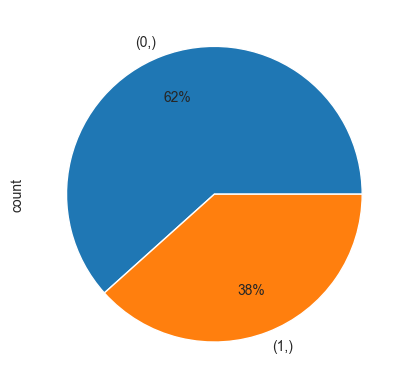

In [13]:
yp.value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

In [14]:
encoded_y = y.apply(encoder.fit_transform)
print(f'in this encoding, {encoded_y.iloc[0].values} represents {y.iloc[0].values}')

in this encoding, [1] represents ['p']


## Evaluation

In [15]:
labels = DataFrame({'y': encoded_y.values.flatten(), 'yp': clusters})
labels.head()

,y,yp
0,1,0
1,0,0
2,0,0
3,1,0
4,0,0


In [16]:
labels.value_counts(["y", "yp"])

y  yp
0  0     4180
1  1     3088
   0      828
0  1       28
Name: count, dtype: int64

### Confusion matrix

[[0.51452486 0.00344658]
 [0.10192024 0.38010832]]


Text(0.5, 23.52222222222222, 'Predicted Labels')

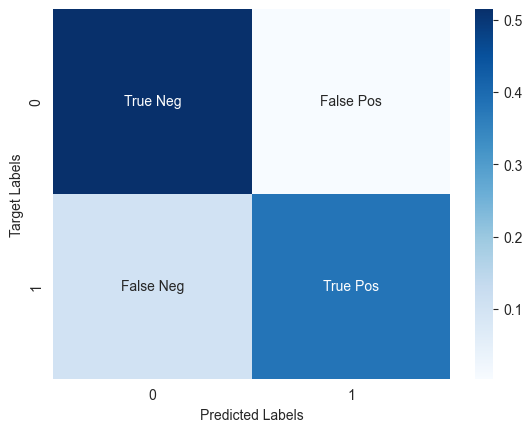

In [17]:
cf_matrix = confusion_matrix(encoded_y, clusters)
print(cf_matrix/np.sum(cf_matrix))
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(1, 1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='', cmap='Blues')
ax.set_ylabel('Target Labels')
ax.set_xlabel('Predicted Labels')

In [18]:
ri = rand_score(y.values.reshape(1, -1)[0], clusters)
ari = adjusted_rand_score(y.values.reshape(1, -1)[0], clusters)

print(f'Rand Index: {ri}')
print(f'Adjusted Rand Index: {ari}')

Rand Index: 0.8114474930707483
Adjusted Rand Index: 0.6228711271435307


In [19]:
True_neg = cf_matrix[0,0]
False_pos = cf_matrix[0,1]
True_pos = cf_matrix[1,1]
False_neg = cf_matrix[1,0]

accuracy = (True_neg + True_pos)/(True_neg + False_neg + True_pos + False_pos)
recall = (True_pos)/(False_neg+True_pos)
precision = (True_pos)/(False_pos + True_pos)
F1_score = 2 * ((precision*recall)/(precision+recall))
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1_score: {F1_score}')

Accuracy: 0.8946331856228459
Recall: 0.7885597548518897
Precision: 0.9910141206675225
F1_score: 0.8782707622298066
